In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import drs4lib as drs
import time

## **Read Data**

In [9]:
tic=time.clock()
fname="../data/pedrun1.dat"
wd=drs.get_events(fname,4000,4200)
toc=time.clock()
print "time elapsed  = ",toc-tic

(12, ' MB occupied')
time elapsed  =  1.166129


## **Plot Event**

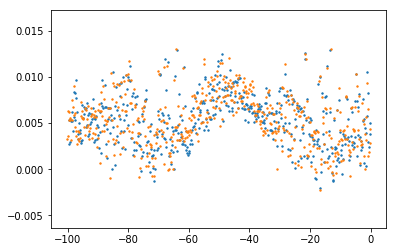

In [10]:
eventID=0
end=-1
start=-512 #end-100
for eventID in range(2):
    chID=0
    dta=np.transpose(wd[eventID][chID])
    dta[0]=dta[0]-dta[0][-1]
    plt.scatter(dta[0][start:end],dta[1][start:end],s=2)
#     plt.xlim([start,end])
# plt.ylim([1000,34000])

### **Integrate the last 'n' bins**

    The bin to start integration

In [16]:
start_bin=-100

    The bin range for the offset evaluation

In [17]:
offset_s=0
offset_e=256

    For integrating single event

In [19]:
eventID=0
chID=0
dta=np.transpose(wd[eventID][chID])
offset_val=np.average(dta[1][offset_s:offset_e])
integ=np.trapz(dta[1][start_bin:]-offset_val,dta[0][start_bin:])
print(integ/2**15/abs(start_bin))

-1.43491900599e-08


    For integrating out the whole dataset

In [22]:
integrals=[]
for i in range(len(wd)):
    eventID=i
    chID=0
    dta=np.transpose(wd[eventID][chID])
    offset_val=np.average(dta[1][offset_s:offset_e])
    integ=np.trapz(dta[1][start_bin:]-offset_val,dta[0][start_bin:])
    integrals.append(integ)
    print("for eventId ",eventID," integral = ",integ)    

('for eventId ', 0, ' integral = ', -0.047019425988322539)
('for eventId ', 1, ' integral = ', -0.038428165861564167)
('for eventId ', 2, ' integral = ', -0.042457293634254434)
('for eventId ', 3, ' integral = ', -0.036060527301591261)
('for eventId ', 4, ' integral = ', -0.044345783680958206)
('for eventId ', 5, ' integral = ', -0.047979891862609314)
('for eventId ', 6, ' integral = ', -0.041396572838752199)
('for eventId ', 7, ' integral = ', -0.040694794830116621)
('for eventId ', 8, ' integral = ', -0.043356871786613294)
('for eventId ', 9, ' integral = ', -0.03841672386275885)
('for eventId ', 10, ' integral = ', -0.040707185449131877)
('for eventId ', 11, ' integral = ', -0.037856519617438522)
('for eventId ', 12, ' integral = ', -0.045599367108712485)
('for eventId ', 13, ' integral = ', -0.041518381005802851)
('for eventId ', 14, ' integral = ', -0.037847052474004883)
('for eventId ', 15, ' integral = ', -0.03956705719807907)
('for eventId ', 16, ' integral = ', -0.042954241760

## **Histogram**

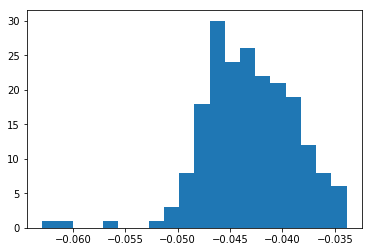

In [24]:
a=plt.hist(integrals,bins=20)

## **For larger datafiles**

In [54]:
fname="../data/pedrun1.dat"
# fname="../data/04feb2020/data3.dat"
integ_savename=fname[:-4]+"_integrals.txt"
figsavename=fname[:-4]+"_hist.png"
SAVE_DATA=True
max_evntID=10000

In [55]:
nstep=1000
start_bin=-512
offset_s=0
offset_e=256

In [56]:
n=0
integrals=[]
if SAVE_DATA:
    f=open(integ_savename,'w')
    f.close()
while(n<max_evntID):
    tic=time.clock()
    print "doing for eventIDs  ",n," to ",n+nstep
    wd=drs.get_events(fname,n,n+nstep)
    for i in range(len(wd)):
        eventID=i
        chID=0
        dta=np.transpose(wd[eventID][chID])
        offset_val=np.average(dta[1][offset_s:offset_e])
        integ=np.trapz(dta[1][start_bin:]-offset_val,dta[0][start_bin:])
        integrals.append(integ)
        if i%500==0:
            print "\t for eventId ",eventID," integral = ",integ
    if SAVE_DATA:
        f=open(integ_savename,'a')
        for i in range(nstep):
            f.write(str(i+n)+","+str(integrals[n+i])+"\n")
        f.close()
        print "integrals saved at : ",integ_savename
    n+=nstep
    toc=time.clock()
    print "dt = ",toc-tic," estimated  time left = ", (toc-tic)*(max_evntID-n)/nstep ," s\n"
integrals=np.array(integrals)   
print "DONE !!" 

doing for eventIDs   0  to  1000
(62, ' MB occupied')
	 for eventId  0  integral =  -0.0552285418596
	 for eventId  500  integral =  -0.0637792313184
	 for eventId  1000  integral =  -0.0761229310243
integrals saved at :  ../data/pedrun1_integrals.txt
dt =  5.525443  estimated  time left =  49.728987  s

doing for eventIDs   1000  to  2000
(62, ' MB occupied')
	 for eventId  0  integral =  -0.0761229310243
	 for eventId  500  integral =  -0.0673979785336
	 for eventId  1000  integral =  -0.076087555819
integrals saved at :  ../data/pedrun1_integrals.txt
dt =  5.529952  estimated  time left =  44.239616  s

doing for eventIDs   2000  to  3000
(62, ' MB occupied')
	 for eventId  0  integral =  -0.076087555819
	 for eventId  500  integral =  -0.0420090065577
	 for eventId  1000  integral =  -0.0869279830903
integrals saved at :  ../data/pedrun1_integrals.txt
dt =  5.512116  estimated  time left =  38.584812  s

doing for eventIDs   3000  to  4000
(62, ' MB occupied')
	 for eventId  0  int

####  **save the integrals**

In [10]:
fsavename=fname[:-4]+"_integrals.txt"
f=open(fsavename,'w')
for i in range(len(integrals)):
    f.write(str(i)+","+str(integrals[i])+"\n")
f.close()
print "integrals saved at : ",fsavename

integrals saved at :  ../data/pedrun1_integrals.txt


### **Histogram**

max_integrals = 0.109323723388  min_integrals  0.00164476203278
10009 items


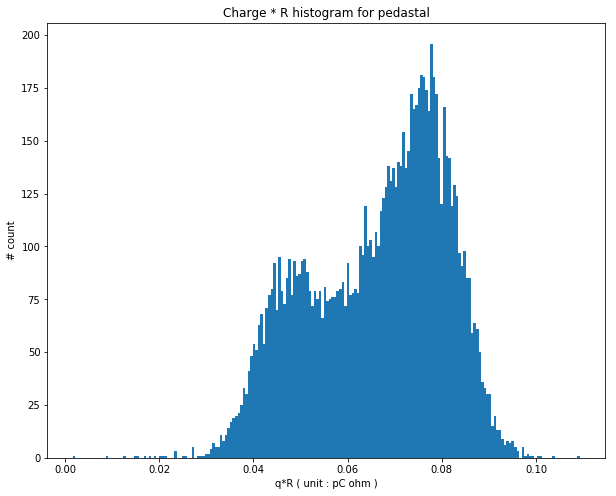

In [60]:
negated_integrals=-1*integrals[:-1]
print "max_integrals =", max(negated_integrals)," min_integrals ",min(negated_integrals)
print len(negated_integrals),"items"
plt.figure(figsize=(10,8))
a=plt.hist(negated_integrals,bins=200)
plt.xlabel("q*R ( unit : pC ohm )")
plt.ylabel("# count")
plt.title("Charge * R histogram for pedastal")
if SAVE_DATA:
    plt.savefig(figsavename,dpi=600)